In [51]:
import pandas as pd
import numpy as np
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sqlalchemy import create_engine


## this is a _Data_Engineer_interview

In [52]:
file_name="C:/Users/Guatavo/Documents/5toSemestre/ETL/wokshop_002/spotify_dataset.csv"
df=pd.read_csv(file_name)
print(df.head())

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


# Analisis Exploratorio De Los Datos
## ¿Qué tipo de dato son las variables del conjunto de datos?

In [53]:
df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [54]:
(
    df
    .dtypes
    .value_counts()
)

float64    9
int64      6
object     5
bool       1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [55]:
df.shape

(114000, 21)

## ¿Existen valores nulos explicitos en el conjunto de datos?

In [56]:
(   df
    .isnull()
    .any()
)

Unnamed: 0          False
track_id            False
artists              True
album_name           True
track_name           True
popularity          False
duration_ms         False
explicit            False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
track_genre         False
dtype: bool

### De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [57]:
(
    df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)


artists             1
album_name          1
track_name          1
Unnamed: 0          0
mode                0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
key                 0
loudness            0
track_id            0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
track_genre         0
dtype: int64

### ¿Cuál es la proporción de valores nulos por cada variable? 

c:\Users\Guatavo\anaconda3\envs\fundamentos-etl\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


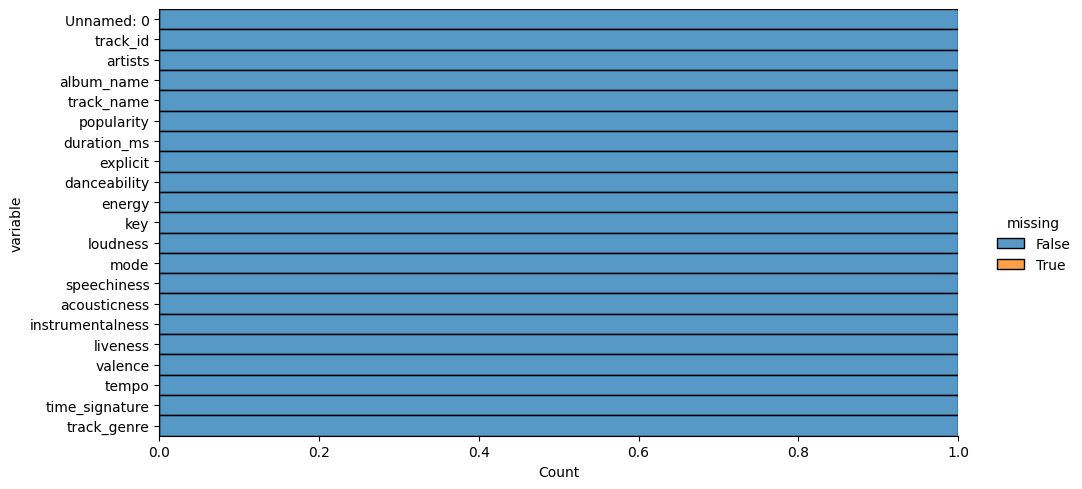

In [58]:
(
    df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [59]:
(
    df
    .isnull()
    .sum()
    .sum()
)

3

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<Axes: >

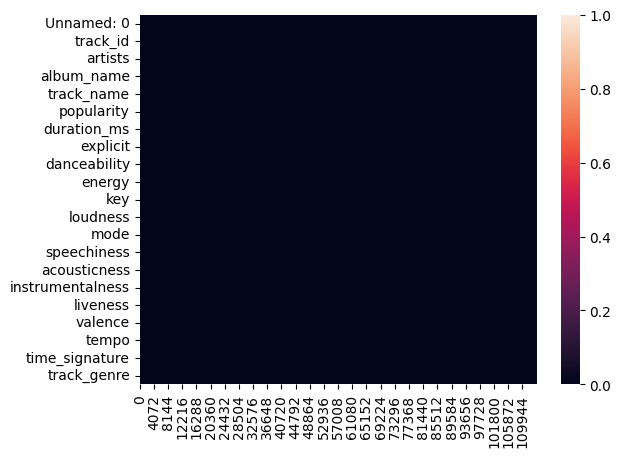

In [60]:
(
    df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [61]:
df_without_nulls = (
    df
    .dropna()
)

df_without_nulls

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [62]:
df.describe(include='all')

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,114000.000000,114000,113999,113999,113999,114000.000000,1.140000e+05,114000,114000.000000,114000.000000,...,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000
unique,NaN,89741,31437,46589,73608,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
top,NaN,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acoustic
freq,NaN,9,279,195,151,NaN,NaN,104253,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,56999.500000,NaN,NaN,NaN,NaN,33.238535,2.280292e+05,NaN,0.566800,0.641383,...,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,NaN
std,32909.109681,NaN,NaN,NaN,NaN,22.305078,1.072977e+05,NaN,0.173542,0.251529,...,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,0.000000,0.000000,...,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,28499.750000,NaN,NaN,NaN,NaN,17.000000,1.740660e+05,NaN,0.456000,0.472000,...,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,NaN
50%,56999.500000,NaN,NaN,NaN,NaN,35.000000,2.129060e+05,NaN,0.580000,0.685000,...,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,NaN
75%,85499.250000,NaN,NaN,NaN,NaN,50.000000,2.615060e+05,NaN,0.695000,0.854000,...,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,NaN


### Solo las numéricas

In [63]:
df.describe(include=[np.number])

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### Solo categóricas - 1

In [64]:
df.describe(include=object)

,track_id,artists,album_name,track_name,track_genre
count,114000,113999,113999,113999,114000
unique,89741,31437,46589,73608,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,acoustic
freq,9,279,195,151,1000


### Solo Booleano

In [65]:
df.describe(include=bool)

,explicit
count,114000
unique,2
top,False
freq,104253


## Analizando la columna Artists que tiene mas de un artista

In [67]:
filtered_df = df[df['artists'].str.contains(';', na=False).fillna(False)]
filtered_df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.1200,76.332,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,...,-8.822,1,0.0355,0.85700,0.000003,0.0913,0.0765,141.284,3,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.414,...,-8.700,1,0.0369,0.29400,0.000000,0.1510,0.6690,130.088,4,acoustic
14,14,4LbWtBkN82ZRhz9jqzgrb3,Chord Overstreet;Deepend,Hold On (Remix),Hold On - Remix,56,188133,False,0.755,0.780,...,-6.084,1,0.0327,0.12400,0.000028,0.1210,0.3870,120.004,4,acoustic
16,16,6xKeQgzfjixSUld14qUezm,Andrew Foy;Renee Foy,ily (i love you baby),ily (i love you baby),56,129750,False,0.706,0.112,...,-18.098,1,0.0391,0.82700,0.000004,0.1250,0.4140,110.154,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113966,113966,42bdU7oDyRvyRXaKbUrtfu,Bethel Music;Bethany Wohrle,Victory (Live),Victory Is Yours - Live,44,333080,False,0.418,0.786,...,-5.257,1,0.0471,0.01050,0.000000,0.3420,0.0656,139.920,4,world-music
113967,113967,1eZYPovTvmxk3QlVD2VpCX,Bethel Music;Brian Johnson,We Will Not Be Shaken (Live),We Will Not Be Shaken - Live,46,332604,False,0.392,0.668,...,-7.342,1,0.0296,0.00356,0.000560,0.5880,0.1150,148.013,4,world-music
113969,113969,7mD7yAQm4GcifSnWqJdZHi,Bethel Music;Molly Skaggs,Victory (Live),Ain’t No Grave - Live,47,493293,False,0.370,0.831,...,-4.484,1,0.0442,0.01290,0.000122,0.1090,0.1850,148.008,4,world-music
113975,113975,2yAo8cJDVoMjBMS5MgrO8P,Hillsong Worship;Hillsong Young & Free,OPEN HEAVEN / River Wild,This Is Living,38,214647,False,0.611,0.857,...,-6.248,0,0.0384,0.00182,0.000000,0.3260,0.4640,128.001,4,world-music


## Corplot Para Analizar las Correlaciones entre Las variables

C:\Users\Guatavo\AppData\Local\Temp\ipykernel_15484\1901838440.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


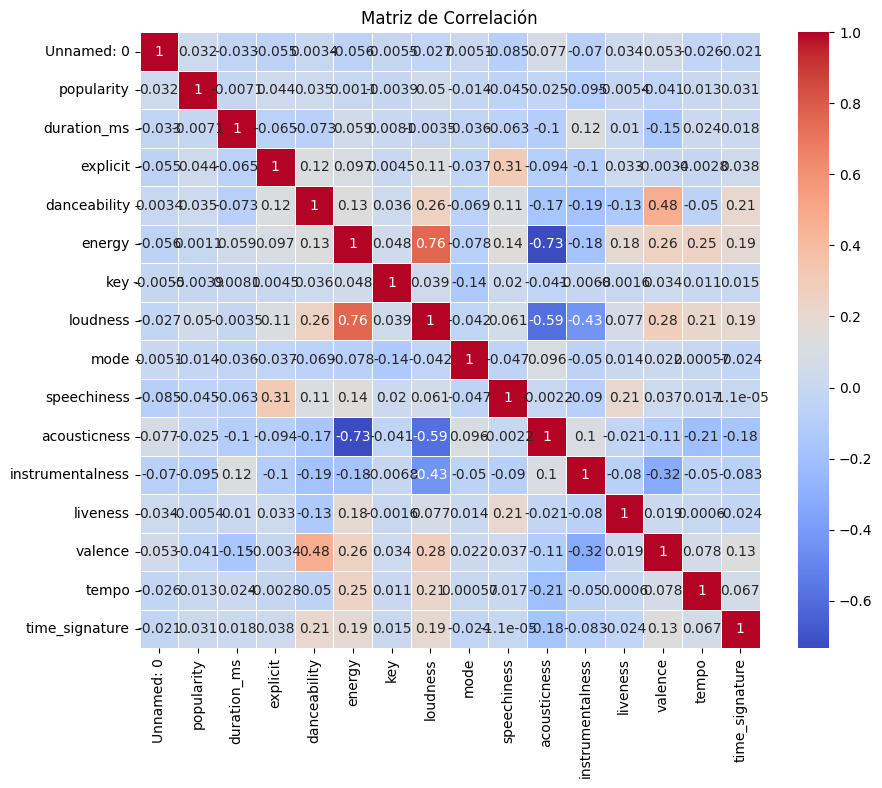

In [ ]:
correlation_matrix = df.corr()

# Crea el gráfico de matriz de correlación (corrplot)
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura según tus preferencias
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Top 10 Artistas

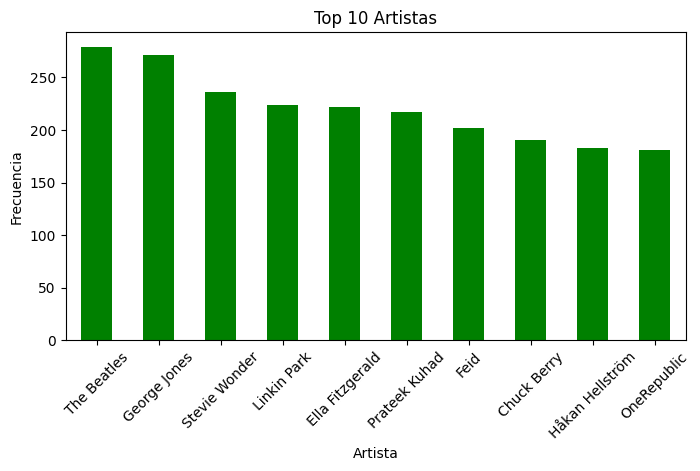

In [ ]:
# 1. Filtrar los 10 artistas con más nominaciones
top_10_artists = df['artists'].value_counts().nlargest(10)

# 2. Crear el gráfico de barras con un tamaño más pequeño
plt.figure(figsize=(8, 4))  # Ancho x Alto en pulgadas
top_10_artists.plot(kind='bar', color='green')
plt.xlabel('Artista')
plt.ylabel('Frecuencia')
plt.title('Top 10 Artistas')
plt.xticks(rotation=45)

# 4. Mostrar la gráfica en pantalla
plt.show()

## Top 10 albumes

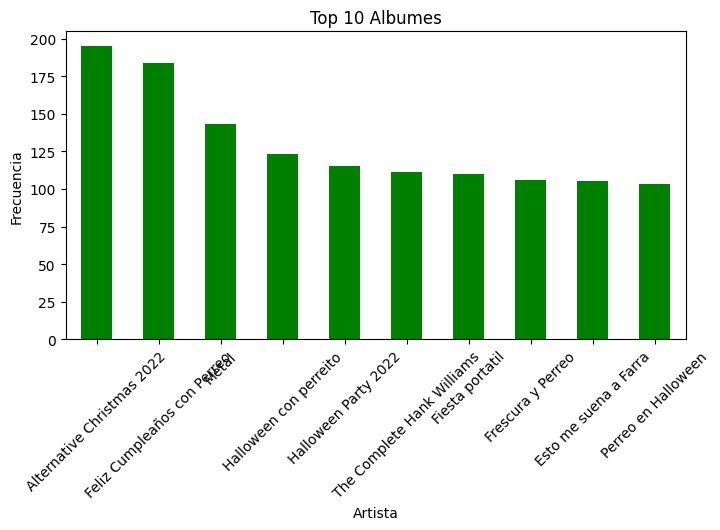

In [ ]:
# 1. Filtrar los 10 artistas con más nominaciones
top_10_artists = df['album_name'].value_counts().nlargest(10)

# 2. Crear el gráfico de barras con un tamaño más pequeño
plt.figure(figsize=(8, 4))  # Ancho x Alto en pulgadas
top_10_artists.plot(kind='bar', color='green')
plt.xlabel('Artista')
plt.ylabel('Frecuencia')
plt.title('Top 10 Albumes')
plt.xticks(rotation=45)

# 4. Mostrar la gráfica en pantalla
plt.show()